<a href="https://colab.research.google.com/github/MJAHMADEE/5-DOF-Robot-Arm/blob/master/Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Bayes

In [ ]:
np.random.seed(42)

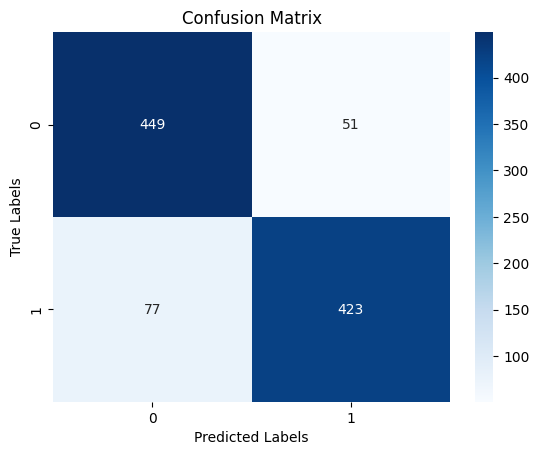

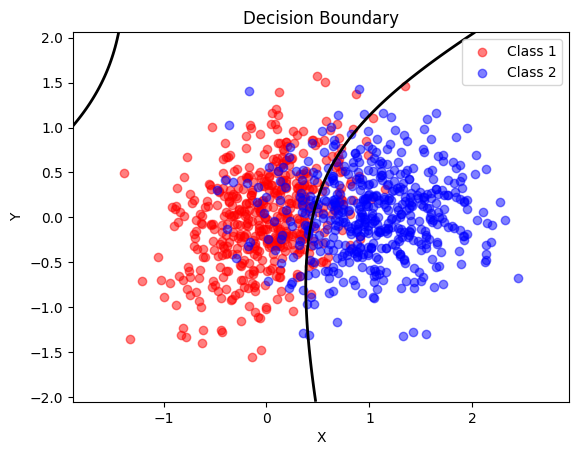

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the covariance matrices and means for the two classes
s1 = np.array([[0.2, 0.1], [0.1, 0.3]])
s2 = np.array([[0.3, 0], [0, 0.2]])
m1 = np.array([0, 0])
m2 = np.array([1, 0])

# Calculate the inverse and determinant of the covariance matrices
inv_sigma1 = np.linalg.inv(s1)
d_sigma1 = np.linalg.det(s1)
inv_sigma2 = np.linalg.inv(s2)
d_sigma2 = np.linalg.det(s2)

# Generate data points for the two classes
data1 = np.hstack((np.random.multivariate_normal(m1, s1, 500), np.ones((500, 1))))
data2 = np.hstack((np.random.multivariate_normal(m2, s2, 500), 2*np.ones((500, 1))))
data = np.vstack((data1, data2))
a, b = data.shape

# Initialize arrays to store probabilities and decisions
d_t1 = np.zeros((a, 2))
d_t2 = np.zeros((a, 2))
p1 = np.zeros((a, 1))
p2 = np.zeros((a, 1))

# Compute the probabilities of the data points belonging to the two classes using the multivariate normal PDF
# This code is implementing the Bayesian classifier using multivariate normal distribution. 
# The loop iterates over each data point in the dataset 'data', and calculates the posterior probabilities of that point belonging to class 1 and class 2.
# For each data point, the 'multivariate_normal.pdf' function from scipy.stats calculates the probability density function of the point using the given mean and covariance matrices for each class. 
# The 'data[i, 0:b-1]' notation is used to select the feature values (i.e., the first b-1 elements) of the i-th data point, since the last column of the dataset contains the class labels.
# The resulting probabilities are stored in arrays 'p1' and 'p2' for each data point, representing the posterior probabilities of the point belonging to class 1 and class 2, respectively.
for i in range(a):
    p1[i] = multivariate_normal.pdf(data[i, 0:b-1], m1, s1)
    p2[i] = multivariate_normal.pdf(data[i, 0:b-1], m2, s2)

# Make decisions based on the computed probabilities
for i in range(a):
    if p1[i] > p2[i]:
        d_t1[i, :] = [1, 0]
    elif p2[i] > p1[i]:
        d_t1[i, :] = [0, 1]

# Create a ground truth array for the class labels of the data
for i in range(a):
    if data[i, b-1] == 1:
        d_t2[i, :] = [1, 0]
    elif data[i, b-1] == 2:
        d_t2[i, :] = [0, 1]

# Calculate the confusion matrix using the ground truth and predicted labels
conf_mat = confusion_matrix(d_t2.argmax(axis=1), d_t1.argmax(axis=1))

# Plot the confusion matrix using a heatmap
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('Fig1.svg')
# plt.savefig('Fig1.pdf')
# plt.savefig('Fig1.png')
plt.show()

# Plot the decision boundary using a contour plot and the data points
fig2 = plt.figure()
x, y = np.mgrid[min(data[:,0])-0.5:max(data[:,0])+0.5:0.01, min(data[:,1])-0.5:max(data[:,1])+0.5:0.01]
pos = np.dstack((x, y))
pdf1 = multivariate_normal.pdf(pos, m1, s1)
pdf2 = multivariate_normal.pdf(pos, m2, s2)
plt.contour(x, y, pdf1-pdf2, levels=[0], colors='k', linewidths=2)
plt.scatter(data1[:,0], data1[:,1], c='r', label='Class 1', alpha=0.5)
plt.scatter(data2[:,0], data2[:,1], c='b', label='Class 2', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Boundary')
plt.legend()
plt.savefig('Fig2.svg')
# plt.savefig('Fig2.pdf')
# plt.savefig('Fig2.png')
plt.show()



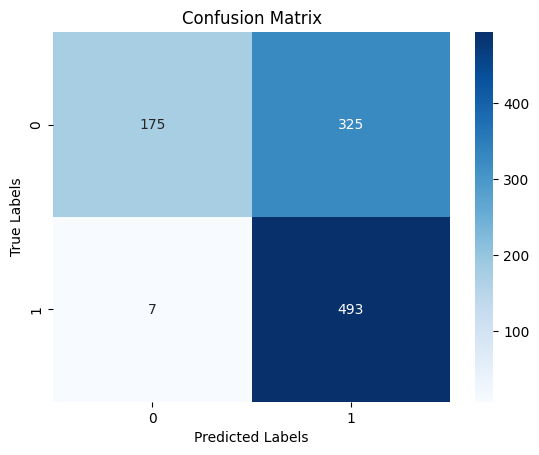

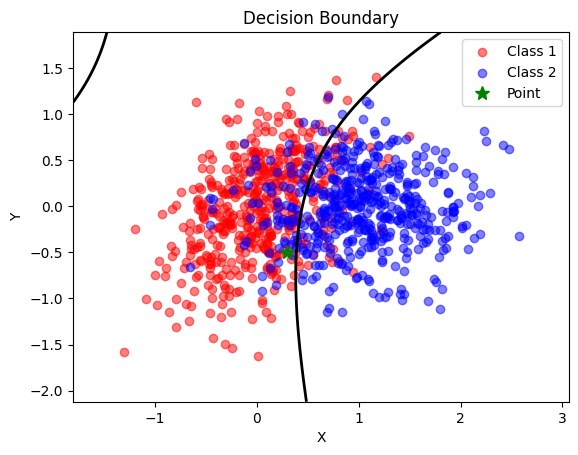

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the covariance matrices and means for the two classes
s1 = np.array([[0.2, 0.1], [0.1, 0.3]])
s2 = np.array([[0.3, 0], [0, 0.2]])
m1 = np.array([0, 0])
m2 = np.array([1, 0])

# Calculate the inverse and determinant of the covariance matrices
inv_sigma1 = np.linalg.inv(s1)
d_sigma1 = np.linalg.det(s1)
inv_sigma2 = np.linalg.inv(s2)
d_sigma2 = np.linalg.det(s2)

# Generate data points for the two classes
data1 = np.hstack((np.random.multivariate_normal(m1, s1, 500), np.ones((500, 1))))
data2 = np.hstack((np.random.multivariate_normal(m2, s2, 500), 2*np.ones((500, 1))))
data = np.vstack((data1, data2))
a, b = data.shape

# Initialize arrays to store probabilities and decisions
d_t1 = np.zeros((a, 2))
d_t2 = np.zeros((a, 2))
p1 = np.zeros((a, 1))
p2 = np.zeros((a, 1))

# Compute the probabilities of the data points belonging to the two classes using the multivariate normal PDF
# This code is implementing the Bayesian classifier using multivariate normal distribution. 
# The loop iterates over each data point in the dataset 'data', and calculates the posterior probabilities of that point belonging to class 1 and class 2.
# For each data point, the 'multivariate_normal.pdf' function from scipy.stats calculates the probability density function of the point using the given mean and covariance matrices for each class. 
# The 'data[i, 0:b-1]' notation is used to select the feature values (i.e., the first b-1 elements) of the i-th data point, since the last column of the dataset contains the class labels.
# The resulting probabilities are stored in arrays 'p1' and 'p2' for each data point, representing the posterior probabilities of the point belonging to class 1 and class 2, respectively.
for i in range(a):
    p1[i] = multivariate_normal.pdf(data[i, 0:b-1], m1, s1)
    p2[i] = multivariate_normal.pdf(data[i, 0:b-1], m2, s2)

# Make decisions based on the computed probabilities
for i in range(a):
    if 0.1*p1[i] > p2[i]:
        d_t1[i, :] = [1, 0]
    elif p2[i] > 0.1*p1[i]:
        d_t1[i, :] = [0, 1]

# Create a ground truth array for the class labels of the data
for i in range(a):
    if data[i, b-1] == 1:
        d_t2[i, :] = [1, 0]
    elif data[i, b-1] == 2:
        d_t2[i, :] = [0, 1]

# Calculate the confusion matrix using the ground truth and predicted labels
conf_mat = confusion_matrix(d_t2.argmax(axis=1), d_t1.argmax(axis=1))

# Plot the confusion matrix using a heatmap
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('Fig1.svg')
# plt.savefig('Fig1.pdf')
# plt.savefig('Fig1.png')
plt.show()

# Plot the decision boundary using a contour plot and the data points
fig2 = plt.figure()
x, y = np.mgrid[min(data[:,0])-0.5:max(data[:,0])+0.5:0.01, min(data[:,1])-0.5:max(data[:,1])+0.5:0.01]
pos = np.dstack((x, y))
pdf1 = multivariate_normal.pdf(pos, m1, s1)
pdf2 = multivariate_normal.pdf(pos, m2, s2)
plt.contour(x, y, pdf1-pdf2, levels=[0], colors='k', linewidths=2)
plt.scatter(data1[:,0], data1[:,1], c='r', label='Class 1', alpha=0.5)
plt.scatter(data2[:,0], data2[:,1], c='b', label='Class 2', alpha=0.5)
plt.plot(00.3, -0.5, 'g*', markersize=10, label='Point')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Boundary')
plt.legend()
plt.savefig('Fig2.svg')
# plt.savefig('Fig2.pdf')
# plt.savefig('Fig2.png')
plt.show()



In [ ]:
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the covariance matrices and means for the two classes
s1 = np.array([[0.2, 0.1], [0.1, 0.3]])
s2 = np.array([[0.3, 0], [0, 0.2]])
m1 = np.array([0, 0])
m2 = np.array([1, 0])

# Define the loss matrix and calculate the risk function
loss_mat = np.array([[0, 0.9], [0.1, 0]])
r_fcn = lambda p1, p2: loss_mat[0, 1] * p1 + loss_mat[1, 0] * p2

# Calculate the inverse and determinant of the covariance matrices
inv_sigma1 = np.linalg.inv(s1)
d_sigma1 = np.linalg.det(s1)
inv_sigma2 = np.linalg.inv(s2)
d_sigma2 = np.linalg.det(s2)

# Generate data points for the two classes
data1 = np.hstack((np.random.multivariate_normal(m1, s1, 500), np.ones((500, 1))))
data2 = np.hstack((np.random.multivariate_normal(m2, s2, 500), 2*np.ones((500, 1))))
data = np.vstack((data1, data2))
a, b = data.shape

# Initialize arrays to store probabilities and decisions
d_t1 = np.zeros((a, 2))
d_t2 = np.zeros((a, 2))
p1 = np.zeros((a, 1))
p2 = np.zeros((a, 1))

# Define a function to calculate the decision boundary based on the loss matrix
def decision_boundary(p1, p2):
    # return (p1 - p2) / (loss_mat[1, 0] - loss_mat[0, 1])
    return loss_mat[1, 0] * p2 - loss_mat[0, 1] * p1 

# Compute the probabilities of the data points belonging to the two classes using the multivariate normal PDF
for i in range(a):
    p1[i] = multivariate_normal.pdf(data[i, 0:b-1], m1, s1)
    p2[i] = multivariate_normal.pdf(data[i, 0:b-1], m2, s2)
    
    # Calculate the decision boundary based on the loss matrix
    db = decision_boundary(p1[i], p2[i])
    
    # Make decisions based on the computed probabilities and decision boundary
    if db > 0:
        d_t1[i, :] = [1, 0]
    else:
        d_t1[i, :] = [0, 1]

# Create a ground truth array for the class labels of the data
for i in range(a):
    if data[i, b-1] == 1:
        d_t2[i, :] = [1, 0]
    elif data[i, b-1] == 2:
        d_t2[i, :] = [0, 1]

# Plot the decision boundary using a contour plot and the data points
fig2 = plt.figure()
x, y = np.mgrid[min(data[:,0])-0.5:max(data[:,0])+0.5:0.01, min(data[:,1])-0.5:max(data[:,1])+0.5:0.01]
xy = np.stack([x.ravel(), y.ravel()], axis=1)
p_xy1 = multivariate_normal.pdf(xy, m1, s1)
p_xy2 = multivariate_normal.pdf(xy, m2, s2)
p1p2 = np.column_stack((p_xy1, p_xy2))
losses = np.dot(p1p2, loss_mat.T)
p_xy = np.argmax(losses, axis=1) == 0
p_xy = p_xy.reshape(x.shape)
plt.contourf(x, y, p_xy, cmap='RdBu', alpha=0.5)
plt.scatter(data1[:,0], data1[:,1], color='b', alpha=0.5)
plt.scatter(data2[:,0], data2[:,1], color='r', alpha=0.5)
plt.plot(0.3, -0.5, 'go', markersize=10, label='Point')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


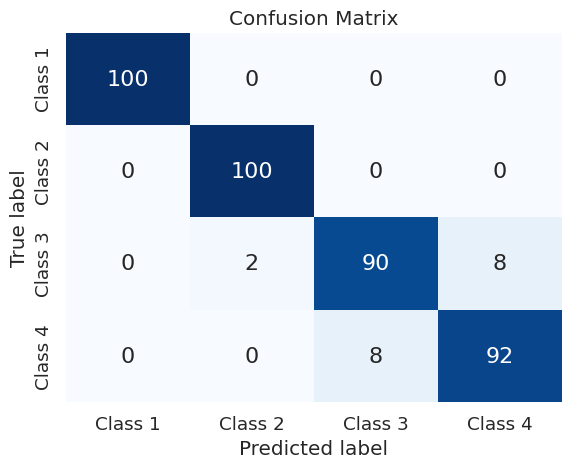

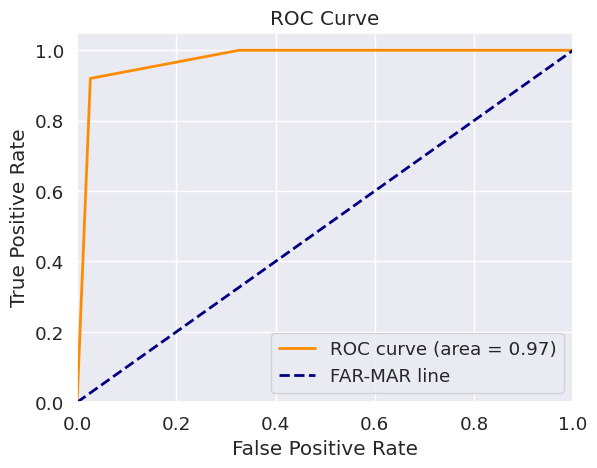

Accuracy: 0.955
Precision: 0.955
Recall: 0.955
F1 Score: 0.955
FAR: 0.000
MAR: 0.000


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_fscore_support

# Load dataset
df = pd.read_csv("dataset.csv")

# Split data and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Fit Bayesian classifier
clf = GaussianNB()
clf.fit(X, y)

# Predict class labels
y_pred = clf.predict(X)

# Calculate metrics
cm = confusion_matrix(y, y_pred)
fpr, tpr, _ = roc_curve(y, y_pred, pos_label=3)
roc_auc = auc(fpr, tpr)
precision, recall, f1score, _ = precision_recall_fscore_support(y, y_pred, average='macro')
accuracy = np.sum(cm.diagonal()) / np.sum(cm)
far = cm[1:, 0].sum() / cm[0, :].sum()
mar = cm[0, 1:].sum() / cm[1:, :].sum()

# Plot confusion matrix
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16}, xticklabels=["Class 1", "Class 2", "Class 3", "Class 4"], yticklabels=["Class 1", "Class 2", "Class 3", "Class 4"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [far, 1-mar], color="navy", lw=2, linestyle="--", label="FAR-MAR line")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Print metrics
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1score))
print("FAR: {:.3f}".format(far))
print("MAR: {:.3f}".format(mar))


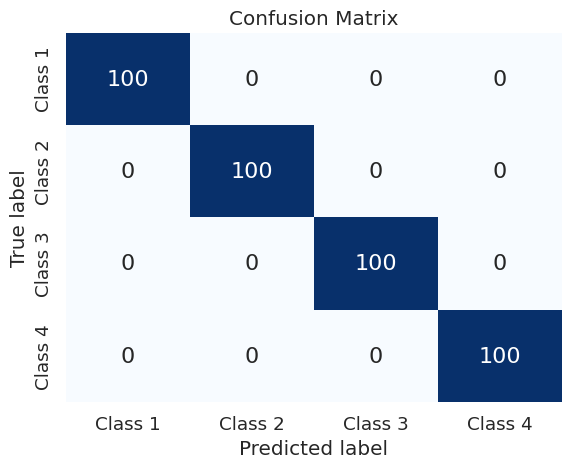

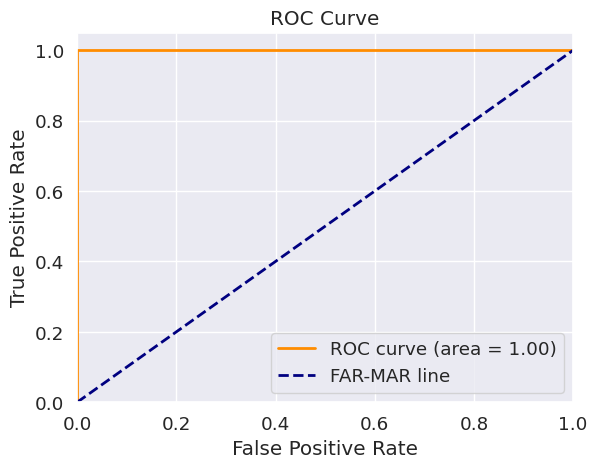

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
FAR: 0.000
MAR: 0.000


In [ ]:
import numpy as np
from scipy.stats import multivariate_normal

class BayesianClassifier:
    def __init__(self):
        self.priors = None
        self.means = None
        self.covs = None
        self.classes = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.priors = np.zeros(len(self.classes))
        self.means = np.zeros((len(self.classes), X.shape[1]))
        self.covs = np.zeros((len(self.classes), X.shape[1], X.shape[1]))
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.priors[i] = len(X_c) / len(X)
            self.means[i] = np.mean(X_c, axis=0)
            self.covs[i] = np.cov(X_c, rowvar=False) + 1e-6*np.eye(X.shape[1])

    def predict(self, X):
        y_pred = np.zeros(X.shape[0], dtype=np.int)
        for i, x in enumerate(X):
            probs = np.zeros(len(self.classes))
            for j, c in enumerate(self.classes):
                probs[j] = self.priors[j] * multivariate_normal.pdf(x, mean=self.means[j], cov=self.covs[j])
            y_pred[i] = self.classes[np.argmax(probs)]
        return y_pred


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_fscore_support

# Load dataset
df = pd.read_csv("dataset.csv")

# Split data and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Fit Bayesian classifier
clf = BayesianClassifier()
clf.fit(X, y)

# Predict class labels
y_pred = clf.predict(X)

# Calculate metrics
cm = confusion_matrix(y, y_pred)
fpr, tpr, _ = roc_curve(y, y_pred, pos_label=3)
roc_auc = auc(fpr, tpr)
precision, recall, f1score, _ = precision_recall_fscore_support(y, y_pred, average='macro')
accuracy = np.sum(cm.diagonal()) / np.sum(cm)
far = cm[1:, 0].sum() / cm[0, :].sum()
mar = cm[0, 1:].sum() / cm[1:, :].sum()

# Plot confusion matrix
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16}, xticklabels=["Class 1", "Class 2", "Class 3", "Class 4"], yticklabels=["Class 1", "Class 2", "Class 3", "Class 4"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [far, 1-mar], color="navy", lw=2, linestyle="--", label="FAR-MAR line")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Print metrics
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1score))
print("FAR: {:.3f}".format(far))
print("MAR: {:.3f}".format(mar))


# Python Examples 2

In [ ]:
import warnings
# Ignore warnings
warnings.filterwarnings('ignore')

Accuracy: 0.995
Precision: 0.9950675675675675
Recall: 0.995
F1 Score: 0.9949931972789117
False Alarm Rate: [0.         0.         0.01351351]


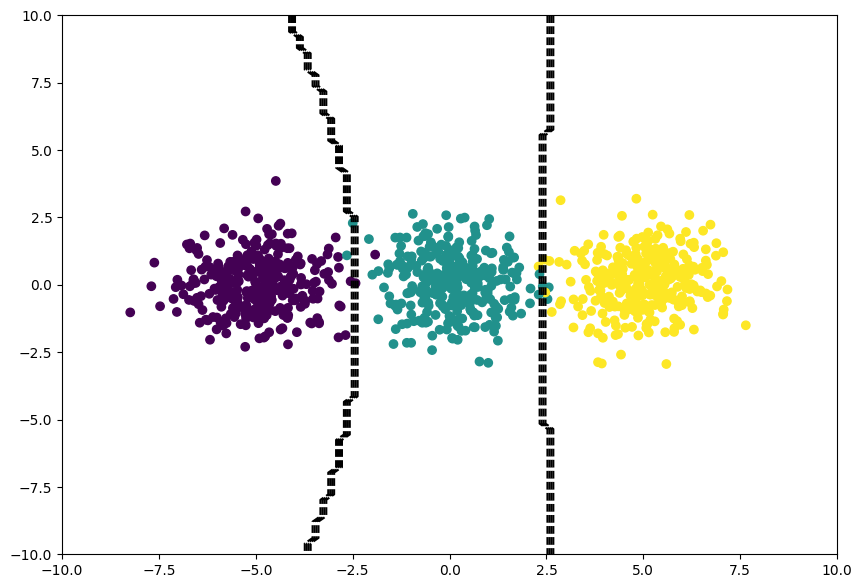

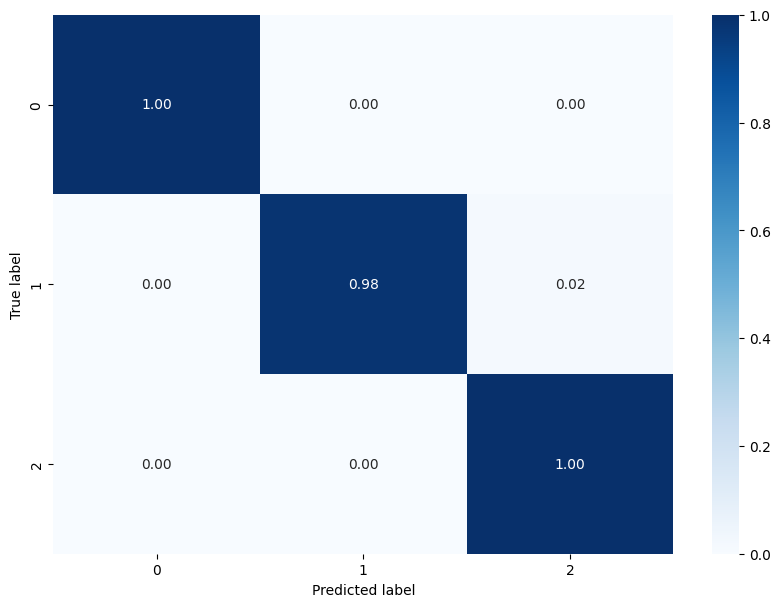

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# import seaborn library for visualization
import seaborn as sns

class BayesClassifier:
    
    def __init__(self):
        self.class_priors = None
        self.class_means = None
        self.class_variances = None
        self.num_classes = None
    
    def fit(self, X, y):
        self.num_classes = len(np.unique(y))
        self.class_priors = np.zeros(self.num_classes)
        self.class_means = np.zeros((self.num_classes, X.shape[1]))
        self.class_variances = np.zeros((self.num_classes, X.shape[1]))

        # Calculate class priors
        for i in range(self.num_classes):
            self.class_priors[i] = np.sum(y == i) / len(y)
        
        # Calculate class means and variances
        for i in range(self.num_classes):
            X_i = X[y == i]
            self.class_means[i] = np.mean(X_i, axis=0)
            self.class_variances[i] = np.var(X_i, axis=0)
            
    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        
        # Calculate posterior probabilities and predict class
        for i in range(X.shape[0]):
            posteriors = np.zeros(self.num_classes)
            for j in range(self.num_classes):
                likelihood = self._gaussian_likelihood(X[i], j)
                posterior = likelihood * self.class_priors[j]
                posteriors[j] = posterior
            y_pred[i] = np.argmax(posteriors)
        
        return y_pred
        
    def _gaussian_likelihood(self, x, j):
        mean = self.class_means[j]
        var = self.class_variances[j]
        return np.exp(-0.5 * np.sum(np.square(x - mean) / var)) / np.sqrt(np.prod(2*np.pi*var))


# Generate random data
X, y = make_blobs(n_samples=1000, centers=[[-5, 0], [0, 0], [5, 0]], cluster_std=1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the Bayesian classifier
clf = BayesClassifier()
clf.fit(X_train, y_train)

# Test the classifier on the test data
y_pred = clf.predict(X_test)

# Print the classification results
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate the false alarm rate (FAR)
cm = confusion_matrix(y_test, y_pred)
false_alarms = np.sum(cm, axis=0) - np.diag(cm)
false_alarm_rate = false_alarms / np.sum(cm, axis=0)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("False Alarm Rate:", false_alarm_rate)

# Plot the data and decision boundary
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='black', linestyles='dashed')
plt.show()

# Plot the confusion matrix as a heatmap
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, cmap='Blues', fmt='.2f')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


Accuracy: 0.735
Precision: 0.7352911164465786
Recall: 0.735
F1 Score: 0.7349801245031127
False Alarm Rate: [0.25510204 0.2745098 ]


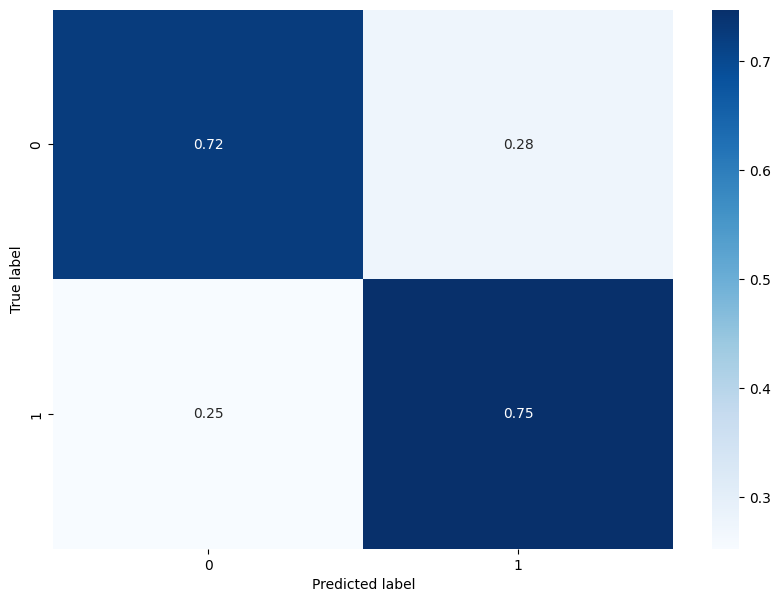

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# import seaborn library for visualization
import seaborn as sns

class BayesClassifier:
    
    def __init__(self):
        self.class_priors = None
        self.class_means = None
        self.class_variances = None
        self.num_classes = None
    
    def fit(self, X, y):
        self.num_classes = len(np.unique(y))
        self.class_priors = np.zeros(self.num_classes)
        self.class_means = np.zeros((self.num_classes, X.shape[1]))
        self.class_variances = np.zeros((self.num_classes, X.shape[1]))

        # Calculate class priors
        for i in range(self.num_classes):
            self.class_priors[i] = np.sum(y == i) / len(y)
        
        # Calculate class means and variances
        for i in range(self.num_classes):
            X_i = X[y == i]
            self.class_means[i] = np.mean(X_i, axis=0)
            self.class_variances[i] = np.var(X_i, axis=0)
            
    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        
        # Calculate posterior probabilities and predict class
        for i in range(X.shape[0]):
            posteriors = np.zeros(self.num_classes)
            for j in range(self.num_classes):
                likelihood = self._gaussian_likelihood(X[i], j)
                posterior = likelihood * self.class_priors[j]
                posteriors[j] = posterior
            y_pred[i] = np.argmax(posteriors)
        
        return y_pred
        
    def _gaussian_likelihood(self, x, j):
        mean = self.class_means[j]
        var = self.class_variances[j]
        return np.exp(-0.5 * np.sum(np.square(x - mean) / var)) / np.sqrt(np.prod(2*np.pi*var))

# Generate random data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=0, n_clusters_per_class=2,
                            class_sep=0.5, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the Bayesian classifier
clf = BayesClassifier()
clf.fit(X_train, y_train)

# Test the classifier on the test data
y_pred = clf.predict(X_test)

# Print the classification results
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate the false alarm rate (FAR)
cm = confusion_matrix(y_test, y_pred)
false_alarms = np.sum(cm, axis=0) - np.diag(cm)
false_alarm_rate = false_alarms / np.sum(cm, axis=0)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("False Alarm Rate:", false_alarm_rate)

# Plot the confusion matrix as a heatmap
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, cmap='Blues', fmt='.2f')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
False Alarm Rate: [0. 0. 0. 0. 0.]


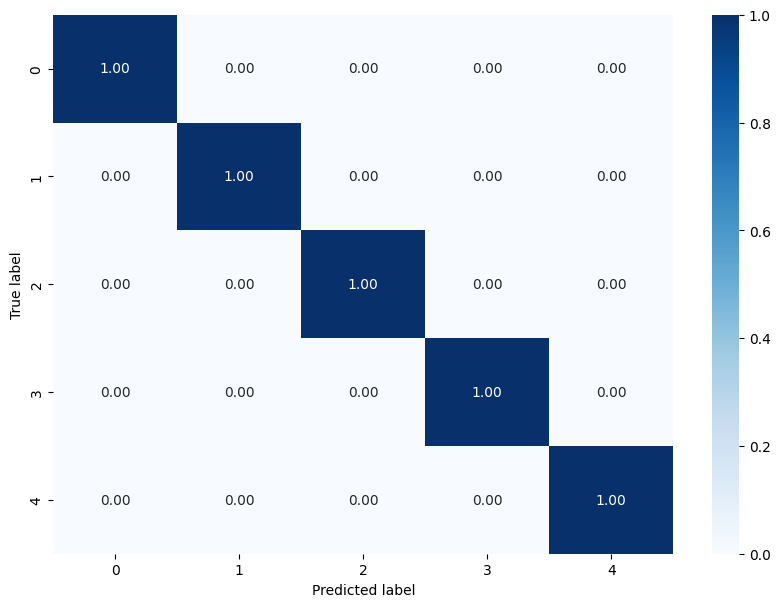

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# import seaborn library for visualization
import seaborn as sns

class BayesClassifier:
    
    def __init__(self):
        self.class_priors = None
        self.class_means = None
        self.class_variances = None
        self.num_classes = None
    
    def fit(self, X, y):
        self.num_classes = len(np.unique(y))
        self.class_priors = np.zeros(self.num_classes)
        self.class_means = np.zeros((self.num_classes, X.shape[1]))
        self.class_variances = np.zeros((self.num_classes, X.shape[1]))

        # Calculate class priors
        for i in range(self.num_classes):
            self.class_priors[i] = np.sum(y == i) / len(y)
        
        # Calculate class means and variances
        for i in range(self.num_classes):
            X_i = X[y == i]
            self.class_means[i] = np.mean(X_i, axis=0)
            self.class_variances[i] = np.var(X_i, axis=0)
            
    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        
        # Calculate posterior probabilities and predict class
        for i in range(X.shape[0]):
            posteriors = np.zeros(self.num_classes)
            for j in range(self.num_classes):
                likelihood = self._gaussian_likelihood(X[i], j)
                posterior = likelihood * self.class_priors[j]
                posteriors[j] = posterior
            y_pred[i] = np.argmax(posteriors)
        
        return y_pred
        
    def _gaussian_likelihood(self, x, j):
        mean = self.class_means[j]
        var = self.class_variances[j]
        return np.exp(-0.5 * np.sum(np.square(x - mean) / var)) / np.sqrt(np.prod(2*np.pi*var))

# Generate random data
num_samples = 1000
num_classes = 5
num_features = 32

np.random.seed(42)

X = np.zeros((num_samples * num_classes, num_features))
y = np.zeros(num_samples * num_classes, dtype='uint8')

# Generate Gaussian mixture data
for i in range(num_classes):
    ix = range(num_samples * i, num_samples * (i + 1))
    n_clusters = np.random.randint(2, 6)
    for j in range(n_clusters):
        # Generate random mean and covariance matrix
        mean = np.random.normal(0, 1, num_features)
        cov = np.diag(np.random.uniform(0.5, 1.5, num_features))
        X[ix] += np.random.multivariate_normal(mean, cov, num_samples)
    y[ix] = i

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the Bayesian classifier
clf = BayesClassifier()
clf.fit(X_train, y_train)

# Test the classifier on the test data
y_pred = clf.predict(X_test)

# Print the classification results
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate the false alarm rate (FAR)
cm = confusion_matrix(y_test, y_pred)
false_alarms = np.sum(cm, axis=0) - np.diag(cm)
false_alarm_rate = false_alarms / np.sum(cm, axis=0)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("False Alarm Rate:", false_alarm_rate)

# Plot the confusion matrix as a heatmap
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, cmap='Blues', fmt='.2f')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
MAR: 0.0
FAR: 0.216
Confusion matrix:
[[216   0   0   0   0]
 [  0 190   0   0   0]
 [  0   0 192   0   0]
 [  0   0   0 210   0]
 [  0   0   0   0 192]]


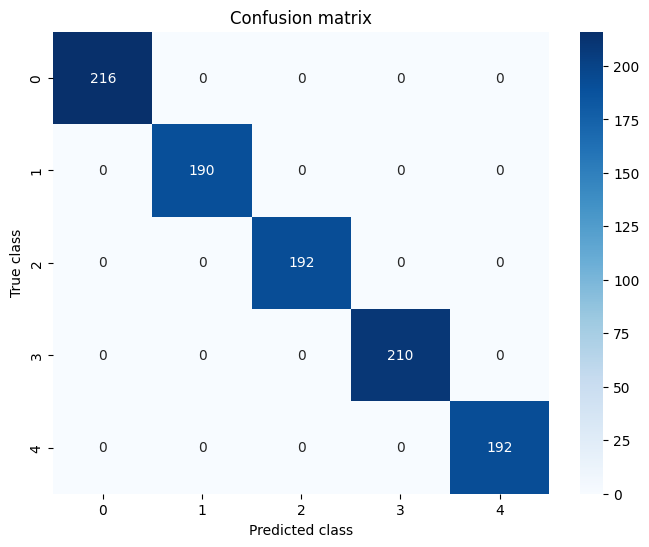

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

class BayesClassifier:
    
    def __init__(self):
        self.class_priors = None
        self.class_means = None
        self.class_variances = None
        self.num_classes = None
    
    def fit(self, X, y):
        self.num_classes = len(np.unique(y))
        self.class_priors = np.zeros(self.num_classes)
        self.class_means = np.zeros((self.num_classes, X.shape[1]))
        self.class_variances = np.zeros((self.num_classes, X.shape[1]))

        # Calculate class priors
        for i in range(self.num_classes):
            self.class_priors[i] = np.sum(y == i) / len(y)
        
        # Calculate class means and variances
        for i in range(self.num_classes):
            X_i = X[y == i]
            self.class_means[i] = np.mean(X_i, axis=0)
            self.class_variances[i] = np.var(X_i, axis=0)
            
    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        
        # Calculate posterior probabilities and predict class
        for i in range(X.shape[0]):
            posteriors = np.zeros(self.num_classes)
            for j in range(self.num_classes):
                likelihood = self._gaussian_likelihood(X[i], j)
                posterior = likelihood * self.class_priors[j]
                posteriors[j] = posterior
            y_pred[i] = np.argmax(posteriors)
        
        return y_pred
        
    def _gaussian_likelihood(self, x, j):
        mean = self.class_means[j]
        var = self.class_variances[j]
        return np.exp(-0.5 * np.sum(np.square(x - mean) / var)) / np.sqrt(np.prod(2*np.pi*var))


# Generate random data
num_samples = 1000
num_classes = 5
num_features = 32

np.random.seed(42)
X = np.zeros((num_samples * num_classes, num_features))
y = np.zeros(num_samples * num_classes, dtype='uint8')
for i in range(num_classes):
    ix = range(num_samples * i, num_samples * (i + 1))
    X[ix] = np.random.normal(i, 1, (num_samples, num_features))
    y[ix] = i

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the Bayesian classifier
clf = BayesClassifier()
clf.fit(X_train, y_train)

# Test the classifier on the test data
y_pred = clf.predict(X_test)

# Compute classification metrics
accuracy = np.mean(y_pred == y_test)
cm = confusion_matrix(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
mar = 1 - recall.mean()
far = cm.sum(axis=0).max() / cm.sum()

# Print the classification results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
print("MAR:", mar)
print("FAR:", far)
print("Confusion matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix')
plt.show()

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
False Alarm Rate: [0. 0. 0. 0. 0.]


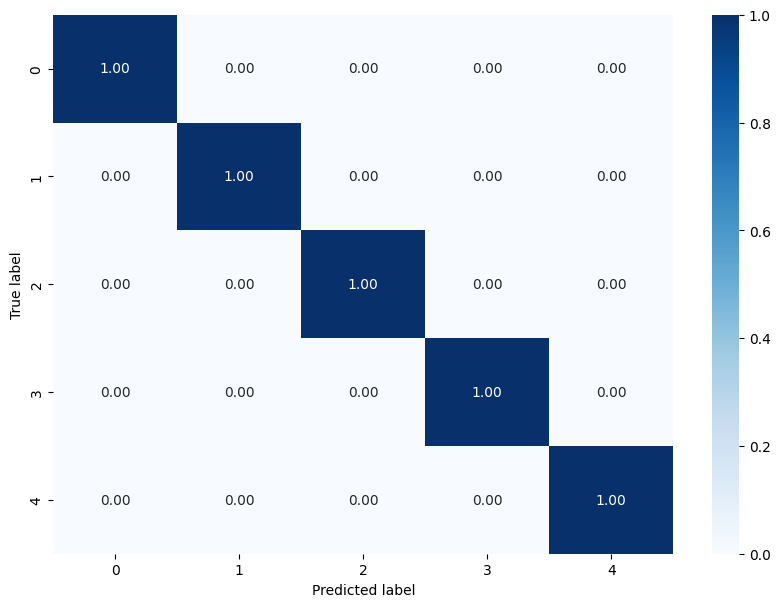

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# import seaborn library for visualization
import seaborn as sns

class BayesClassifier:
    
    def __init__(self):
        self.class_priors = None
        self.class_means = None
        self.class_variances = None
        self.num_classes = None
    
    def fit(self, X, y):
        self.num_classes = len(np.unique(y))
        self.class_priors = np.zeros(self.num_classes)
        self.class_means = np.zeros((self.num_classes, X.shape[1]))
        self.class_variances = np.zeros((self.num_classes, X.shape[1]))

        # Calculate class priors
        for i in range(self.num_classes):
            self.class_priors[i] = np.sum(y == i) / len(y)
        
        # Calculate class means and variances
        for i in range(self.num_classes):
            X_i = X[y == i]
            self.class_means[i] = np.mean(X_i, axis=0)
            self.class_variances[i] = np.var(X_i, axis=0)
            
    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        
        # Calculate posterior probabilities and predict class
        for i in range(X.shape[0]):
            posteriors = np.zeros(self.num_classes)
            for j in range(self.num_classes):
                likelihood = self._gaussian_likelihood(X[i], j)
                posterior = likelihood * self.class_priors[j]
                posteriors[j] = posterior
            y_pred[i] = np.argmax(posteriors)
        
        return y_pred
        
    def _gaussian_likelihood(self, x, j):
        mean = self.class_means[j]
        var = self.class_variances[j]
        return np.exp(-0.5 * np.sum(np.square(x - mean) / var)) / np.sqrt(np.prod(2*np.pi*var))

# Generate random data
num_samples = 1000
num_classes = 5
num_features = 32

np.random.seed(42)
X = np.zeros((num_samples * num_classes, num_features))
y = np.zeros(num_samples * num_classes, dtype='uint8')
for i in range(num_classes):
    ix = range(num_samples * i, num_samples * (i + 1))
    X[ix] = np.random.normal(i, 1, (num_samples, num_features))
    y[ix] = i

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the Bayesian classifier
clf = BayesClassifier()
clf.fit(X_train, y_train)

# Test the classifier on the test data
y_pred = clf.predict(X_test)

# Print the classification results
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate the false alarm rate (FAR)
cm = confusion_matrix(y_test, y_pred)
false_alarms = np.sum(cm, axis=0) - np.diag(cm)
false_alarm_rate = false_alarms / np.sum(cm, axis=0)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("False Alarm Rate:", false_alarm_rate)

# Plot the confusion matrix as a heatmap
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, cmap='Blues', fmt='.2f')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


The threshold is used to adjust the sensitivity and specificity of the classifier.

In a classification problem, a threshold value is used to convert the output of a classifier (which is often a probability score) into a binary decision (class label). If the threshold is set too high, the classifier may miss some positive instances and produce a high number of false negatives. On the other hand, if the threshold is set too low, the classifier may produce a high number of false positives.

By adjusting the threshold value, we can control the trade-off between sensitivity and specificity of the classifier. A high threshold will result in high specificity and low sensitivity, while a low threshold will result in high sensitivity and low specificity.

In some applications, such as medical diagnosis or fraud detection, it may be more important to have high specificity (low false positive rate) at the expense of lower sensitivity (possibly missing some true positives). In other applications, such as spam filtering, it may be more important to have high sensitivity (low false negative rate) at the expense of lower specificity (allowing some false positives).

To adjust for a threshold in the Bayes classifier, we can modify the predict method to return a predicted class only if the maximum posterior probability exceeds a certain threshold. Here is an updated implementation of the BayesClassifier class with a threshold parameter:

In [ ]:
from scipy.stats import mvn

class BayesClassifier:
    def __init__(self):
        self.priors = None
        self.means = None
        self.covariances = None
        self.classes = None
        self.threshold = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.priors = np.zeros(len(self.classes))
        self.means = np.zeros((len(self.classes), X.shape[1]))
        self.covariances = np.zeros((len(self.classes), X.shape[1], X.shape[1]))

        for i, c in enumerate(self.classes):
            Xc = X[y == c]
            self.priors[i] = Xc.shape[0] / X.shape[0]
            self.means[i] = np.mean(Xc, axis=0)
            self.covariances[i] = np.cov(Xc.T)

    def predict(self, X):
        y_pred = []
        for i, x in enumerate(X):
            posteriors = []
            for j, c in enumerate(self.classes):
                prior = np.log(self.priors[j])
                likelihood = mvn.logpdf(x, self.means[j], self.covariances[j])
                posterior = prior + likelihood
                posteriors.append(posterior)
            pred_class = np.argmax(posteriors)
            max_posterior = np.exp(posteriors[pred_class])
            if self.threshold and max_posterior < self.threshold:
                y_pred.append(-1)  # reject prediction
            else:
                y_pred.append(self.classes[pred_class])
        return np.array(y_pred)


To use the threshold parameter, we can pass a value to the threshold attribute of the BayesClassifier object before calling predict. For example, to set a threshold of 0.8:

In [ ]:
clf = BayesClassifier()
clf.fit(X_train, y_train)
clf.threshold = 0.8  # set threshold
y_pred = clf.predict(X_test)


In this updated code, we added an optional threshold parameter to the predict method. We use this parameter to apply a threshold to the class prediction. If the maximum posterior probability for a sample is below the threshold, we classify it as -1.

So, we can replace mvn.logpdf with multivariate_normal.logpdf from the scipy.stats module. Here's the updated code for the BayesClassifier class:

In [ ]:
from scipy.stats import multivariate_normal
import numpy as np

class BayesClassifier:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.priors = np.zeros(len(self.classes))
        self.means = []
        self.covariances = []

        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.priors[i] = len(X_c) / len(X)
            self.means.append(np.mean(X_c, axis=0))
            self.covariances.append(np.cov(X_c.T))

    def predict(self, X, threshold=0.5):
        posteriors = []
        for x in X:
            for j, c in enumerate(self.classes):
                prior = np.log(self.priors[j])
                likelihood = multivariate_normal.logpdf(x, self.means[j], self.covariances[j])
                posterior = prior + likelihood
                posteriors.append(posterior)

        posteriors = np.array(posteriors).reshape(len(X), len(self.classes))
        y_pred = self.classes[np.argmax(posteriors, axis=1)]
        
        # Apply threshold to class prediction
        y_pred[np.max(posteriors, axis=1) < threshold] = -1
        
        return y_pred


# Python Examples 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import euclidean, mahalanobis
from scipy.stats import multivariate_normal
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import mahalanobis

# Load the dataset from a CSV file
df = pd.read_csv('/content/drive/MyDrive/HW1/Data/DataCSV/17112001.csv')
dftest = pd.read_csv('/content/drive/MyDrive/HW1/Data/DataCSV/09112001.csv')

# Define the indices of the rows for each class
class1_idx = np.concatenate([np.arange(56670,56770), np.arange(57475,57530), np.arange(57675,57800)])
class2_idx = np.concatenate([np.arange(53780,53794), np.arange(54193,54215)])
class3_idx = np.arange(54600,54700)
class4_idx = np.concatenate([np.arange(55482,55517), np.arange(55977,56015), np.arange(57030,57072), np.arange(58150,58325)])
class5_idx = np.setdiff1d(np.arange(df.shape[0]), np.concatenate([class1_idx, class2_idx, class3_idx, class4_idx]))

testclass1_idx = np.concatenate([np.arange(57275,57550), np.arange(60650,60700), np.arange(60870,60960)])
testclass3_idx = np.concatenate([np.arange(58830,58930), np.arange(58520,58625)])
testclass5_idx = np.setdiff1d(np.arange(df.shape[0]), np.concatenate([testclass1_idx,testclass3_idx]))

test_idx = np.concatenate([testclass1_idx, testclass3_idx, testclass5_idx])

# Assign class labels to each row
y = np.zeros(df.shape[0])
y[class1_idx] = 1
y[class2_idx] = 2
y[class3_idx] = 3
y[class4_idx] = 4
y[class5_idx] = 5

y_test = np.zeros(dftest.shape[0])
y_test[class1_idx] = 1
# y[class2_idx] = 2
y_test[class3_idx] = 3
# y[class4_idx] = 4
y_test[class5_idx] = 5

# Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(df.values, y, test_size=0.1, random_state=1)
X_train = df.values
y_train = y
X_test = dftest.values[test_idx]
y_test = y_test

# Define the classifiers
class BayesianClassifier:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = np.array([X[y == c].mean(axis=0) for c in self.classes])
        self.covs = np.array([np.cov(X[y == c].T) for c in self.classes])
        self.priors = np.array([np.mean(y == c) for c in self.classes])
        
    def predict(self, X):
        probs = [multivariate_normal.pdf(X, mean=m, cov=c) for m, c in zip(self.means, self.covs)]
        likelihood = np.array(probs).T
        evidence = np.sum(likelihood * self.priors, axis=1)
        posterior = likelihood * self.priors / evidence[:, np.newaxis]
        return self.classes[np.argmax(posterior, axis=1)]

class EuclideanClassifier:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = np.array([X[y == c].mean(axis=0) for c in self.classes])
        
    def predict(self, X):
        X = X.reshape(1, -1)
        dist = euclidean_distances(X, self.means)
        return self.classes[np.argmin(dist)]

class MahalanobisClassifier:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = np.array([X[y == c].mean(axis=0) for c in self.classes])
        self.covs = np.array([np.cov(X[y == c].T) for c in self.classes])
        
    def predict(self, X):
        X = X.reshape(1, -1)
        dist = mahalanobis_distances(X, self.means, self.covs)
        return self.classes[np.argmin(dist)]
    
def mahalanobis_distances(X, means, covs):
    dists = []
    for mean, cov in zip(means, covs):
        mean_diff = X - mean
        dist = np.sqrt(mean_diff @ np.linalg.inv(cov) @ mean_diff.T)
        dists.append(dist)
    return np.array(dists).reshape(-1)